In [67]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers



2021-08-22 21:25:54.304254: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


''

In [54]:
input_shape = (64,64,3)
def modelo():
    model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=128,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)

    return model

In [55]:
model = modelo()
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [56]:
gerador_treinamento = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255, rotation_range= 7, horizontal_flip = True, shear_range = 0.2, 
                                                                   height_shift_range = 0.007, zoom_range = 0.2)
gerador_teste = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

In [57]:
base_treinamento = gerador_treinamento.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=8, class_mode='binary')
base_teste = gerador_teste.flow_from_directory('dataset/test_set/',target_size=(64,64),batch_size=1,class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1007 images belonging to 2 classes.


In [58]:
%%time
model.fit(base_treinamento, epochs=15)

Epoch 1/15
500/500 [==============================] - 21s 42ms/step - loss: 0.7934 - accuracy: 0.5560
Epoch 2/15
500/500 [==============================] - 21s 41ms/step - loss: 0.6141 - accuracy: 0.6571
Epoch 3/15
500/500 [==============================] - 19s 38ms/step - loss: 0.6003 - accuracy: 0.6781
Epoch 4/15
500/500 [==============================] - 18s 36ms/step - loss: 0.5712 - accuracy: 0.7071
Epoch 5/15
500/500 [==============================] - 18s 37ms/step - loss: 0.5482 - accuracy: 0.7121
Epoch 6/15
500/500 [==============================] - 18s 37ms/step - loss: 0.5392 - accuracy: 0.7300
Epoch 7/15
500/500 [==============================] - 19s 37ms/step - loss: 0.5170 - accuracy: 0.7488
Epoch 8/15
500/500 [==============================] - 19s 38ms/step - loss: 0.5052 - accuracy: 0.7574
Epoch 9/15
500/500 [==============================] - 19s 38ms/step - loss: 0.4848 - accuracy: 0.7576
Epoch 10/15
500/500 [==============================] - 19s 38ms/step - loss: 0.452

In [59]:
score = model.evaluate(base_teste, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5289026498794556
Test accuracy: 0.7606752514839172


In [60]:
model.save(
    'testeCachorro',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

INFO:tensorflow:Assets written to: testeCachorro/assets


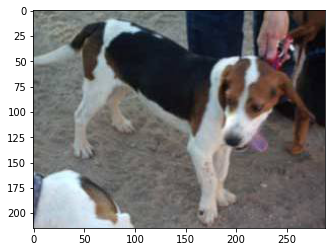

In [61]:
imagem_teste = keras.preprocessing.image.load_img('dataset/test_set/cachorro/dog.3500.jpg')
imagem = plt.imshow(imagem_teste)
plt.show()

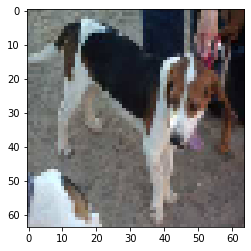

array([[0.9393908]], dtype=float32)

In [62]:
imagem_teste = keras.preprocessing.image.load_img('dataset/test_set/cachorro/dog.3500.jpg',target_size=(64,64))
imagem = plt.imshow(imagem_teste)
plt.show()

imagem_teste = keras.preprocessing.image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste,axis=0)

previsao = model.predict(imagem_teste)
previsao

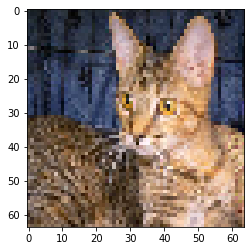

array([[0.73427385]], dtype=float32)

In [63]:
imagem_teste = keras.preprocessing.image.load_img('dataset/test_set/gato/cat.3505.jpg',target_size=(64,64))
imagem = plt.imshow(imagem_teste)
plt.show()

imagem_teste = keras.preprocessing.image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste,axis=0)

previsao = model.predict(imagem_teste)
previsao

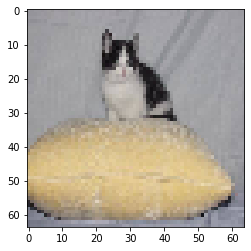

array([[0.91891885]], dtype=float32)

In [64]:
imagem_teste = keras.preprocessing.image.load_img('dataset/test_set/gato/cat.3511.jpg',target_size=(64,64))
imagem = plt.imshow(imagem_teste)
plt.show()

imagem_teste = keras.preprocessing.image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste,axis=0)

previsao = model.predict(imagem_teste)
previsao

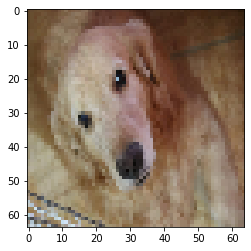

array([[0.34334624]], dtype=float32)

In [65]:
imagem_teste = keras.preprocessing.image.load_img('/home/pedrodsk/Downloads/cristal.jpeg',target_size=(64,64))
imagem = plt.imshow(imagem_teste)
plt.show()

imagem_teste = keras.preprocessing.image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste,axis=0)

previsao = model.predict(imagem_teste)
previsao

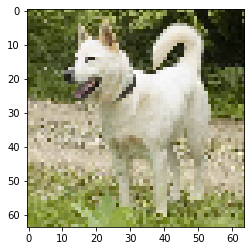

array([[0.46723124]], dtype=float32)

In [66]:
imagem_teste = keras.preprocessing.image.load_img('dataset/test_set/cachorro/dog.3508.jpg',target_size=(64,64))
imagem = plt.imshow(imagem_teste)
plt.show()

imagem_teste = keras.preprocessing.image.img_to_array(imagem_teste)
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste,axis=0)

previsao = model.predict(imagem_teste)
previsao

{'cachorro': 0, 'gato': 1}

In [ ]:
base_treinamento.class_indices